# Camera connectivity and contol

There are multiple way that you can connect to a camera using the QSCOPE framework. In this notebook we show the various ways that you can connect a piece of equipment and control it.  

### Reset the camera 
if you are having issues connecting to it in the GUI try this. 

In [2]:
import pylablib as pll

# Load the dlls for the Andor camera
lib_folder = "C:\\Qscope\\proprietary_artefacts"
pll.par["devices/dlls/andor_sdk3"] = lib_folder
import pylablib.devices.Andor

# Create the camera object
cam = pylablib.devices.Andor.AndorSDK3Camera()
# Open the camera
cam.open()
# Set the trigger mode to internal
cam.set_trigger_mode("int")
# Set the exposure time to 1 second
cam.set_exposure(1)
# Capture an image
image = cam.snap()
# Close the camera
cam.close()

### Opening the camera directly
You can open the camera using the inbuilt dlls (or the additional dlls for some cameras). 

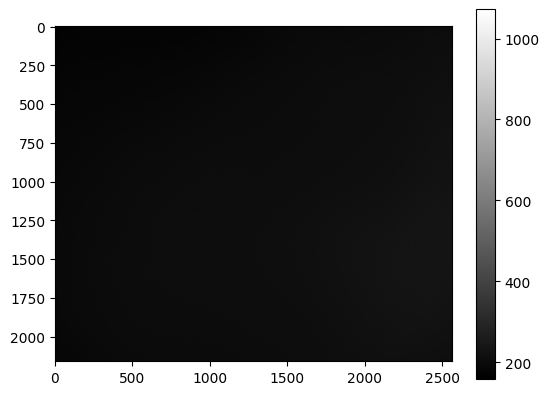

In [3]:
# Import startard libraries
import os

import matplotlib.pyplot as plt
import numpy as np

# Import addtional control libraries
import pylablib as pll
import pylablib.devices.Andor

# Import Logging libraries
from loguru import logger

# from qscope.device import Camera
# from qscope.util.logging import format_error_response
# this_folder = os.path.abspath(os.path.realpath(os.path.dirname(__file__)))
# lib_folder = os.path.abspath(
#     os.path.join(this_folder, *[".." for i in range(5)], "proprietary_artefacts")
# )

lib_folder = "C:\\Qscope\\proprietary_artefacts"  # Load the dlls for the Andor camera
pll.par["devices/dlls/andor_sdk3"] = lib_folder

# Create the camera object
cam = pylablib.devices.Andor.AndorSDK3Camera()
# Open the camera
cam.open()
# Set the trigger mode to internal
cam.set_trigger_mode("int")
# Set the exposure time to 1 second
cam.set_exposure(1)
# Capture an image
image = cam.snap()
# Close the camera
cam.close()

# Display the image
plt.imshow(image, cmap="gray")
plt.colorbar()
plt.show()

# Instantiating a system
You can also create a system object and then control the camera throught the system itself, which is ultimately the way the gui works al beit through a messaging server. 

In [1]:
import matplotlib.pyplot as plt

import qscope.device.seqgen.pulseblaster.spinapi as pb
import qscope.system
from qscope.device.seqgen.pulseblaster import PulseBlaster
from qscope.system import SGCameraSystem
# from qscope.system.config import HQDM, MockSetup

# open the system
system_config = qscope.system.get_system_config("gmx")
systyp = system_config.system_type
system = systyp(system_config)

system.startup()

2025-04-23 09:18:40.078 | WARNING  | qscope.device.picoscope.picoscope:<module>:59 - PicoSDK not available - Picoscope functionality will be limited
2025-04-23 09:18:40.094 | INFO     | qscope.system.system:__init__:254 - Using system configuration of type SystemConfig
2025-04-23 09:18:40.094 | INFO     | qscope.system.system:_init_dev_config:355 - Initialising devices.
2025-04-23 09:18:40.095 | INFO     | qscope.system.system:_init_dev_config:380 - Initialized PulseBlaster with role SEQUENCE_GEN
2025-04-23 09:18:40.096 | INFO     | qscope.system.system:_init_dev_config:380 - Initialized SynthNV with role PRIMARY_RF
2025-04-23 09:18:40.096 | INFO     | qscope.system.system:_init_dev_config:380 - Initialized Zyla55 with role MAIN_CAMERA
2025-04-23 09:18:40.099 | INFO     | qscope.device.seqgen.pulseblaster.spinapi:_checkloaded:77 - Using SpinAPI version b'20171214'
2025-04-23 09:18:40.112 | INFO     | qscope.device.seqgen.pulseblaster.pulseblaster:open:66 - Pulseblaster opened, status: 

{'PulseBlaster_1': {'status': True, 'message': 'Pulseblaster opened'},
 'SynthNV_1': {'status': True,
  'message': 'Connected to RF source: windfreak on port COM5'},
 'Zyla55_1': {'status': True,
  'message': "Connected to Camera: TDeviceInfo(camera_name='Zyla', camera_model='ZYLA-5.5-USB3-W', serial_number='VSC-15006', firmware_version='15.8.12.0', software_version='3.15.30084.0')"}}

In [2]:
# set the camera parameters
from qscope.types import MAIN_CAMERA, PREFIX_TO_ROLE, PRIMARY_RF, SEQUENCE_GEN
role = MAIN_CAMERA
frame_shape = (1024, 1024)
system.get_device_by_role(role).set_roi(frame_shape)
system.get_device_by_role(role).set_exposure_time(0.1)

# ce.andor.Zyla55.set_exposure_time(0.1)
# system.camera.set_hardware_binning((1, 1))
# system.camera.set_roi((0, 0, 1024, 1024))
# capture an image
image = system.get_device_by_role(role).take_snapshot()
# display the image
plt.figure()
plt.imshow(image, cmap="gray")
plt.colorbar()
plt.show()

In [3]:
# Turn the laser on
# TODO: This is not working
system.set_laser_output(1)

image = system.get_device_by_role(role).take_snapshot()
# display the image
plt.figure()
plt.imshow(image, cmap="gray")
plt.colorbar()
plt.show()

# Turn the laser off
system.set_laser_output(0)

2025-04-23 09:18:58.438 | INFO     | qscope.device.seqgen.pulseblaster.pulseblaster:laser_output:273 - Laser set to on
2025-04-23 09:19:08.119 | INFO     | qscope.device.seqgen.pulseblaster.pulseblaster:laser_output:276 - Laser set to off


In [4]:
# close the system
system.packdown()

2025-04-23 09:19:10.692 | INFO     | qscope.device.andor.andor:close:84 - Disconnected from Camera: ZYLA-5.5-USB3-W


# Connection to the camera through the server


In [3]:
import qscope.server

# Start the client server
qscope.server.start_client_log(log_to_stdout=True, log_level="INFO")

# Start the connection manager
manager = qscope.server.ConnectionManager()
# Start connection manager and define the system
try:
    manager.start_local_server(
        # "zyla",
        # "hqdm",
        "gmx",
    ) # logs go to ~./qscope/server.log
    # Connect to the server
    manager.connect()
    manager.startup()
except qscope.server.ServerAlreadyRunning:
    manager.connect()
    pass

2025-04-23 09:25:06.320 | INFO     | qscope.util.logging:start_client_log:50 - Client log started at C:\Users\GMX\.qscope\client.log
2025-04-23 09:25:06.323 | INFO     | qscope.server.client:open_connection:498 - Attempting initial connection to server on 127.0.0.1:8850.
2025-04-23 09:25:06.327 | INFO     | qscope.server.client:open_connection:505 - Initial connection appears successful
2025-04-23 09:25:06.328 | INFO     | qscope.server.client:_confirm_connection:358 - Confirming connection to server...
2025-04-23 09:25:11.333 | WARNING  | qscope.server.client:_confirm_connection:370 - No response from server...
2025-04-23 09:25:11.333 | INFO     | qscope.server.client:_confirm_connection:380 - Trying again...
2025-04-23 09:25:16.341 | WARNING  | qscope.server.client:_confirm_connection:370 - No response from server...
2025-04-23 09:25:16.341 | INFO     | qscope.server.client:_confirm_connection:380 - Trying again...
2025-04-23 09:25:21.347 | WARNING  | qscope.server.client:_confirm_co

In [6]:
manager.camera_start_video()

MsgResponse(type=msg, value=Started video.)

In [7]:
manager.camera_stop_video()

MsgResponse(type=msg, value=Stopped video.)

In [8]:
manager.save_latest_stream("data")

'C:\\ExperimentalData\\2025\\2025-04\\2025-04-17_data///0002_stream'

In [4]:
manager.stop_server()

2025-04-23 09:25:38.663 | INFO     | qscope.server.connection_manager:stop_local_server:207 - Shutting down local server.
2025-04-23 09:25:38.874 | INFO     | qscope.server.client:shutdown_server:804 - Server shutdown initiated successfully
2025-04-23 09:25:38.874 | INFO     | qscope.server.client:kill_bg_server:216 - Killing server process.
2025-04-23 09:25:38.892 | ERROR    | qscope.server.client:kill_bg_server:226 - #======= Server killed, errs: =======#
2025-04-23 09:25:38.892 | ERROR    | qscope.server.client:kill_bg_server:227 - 2025-04-23 09:25:23.106 | WARNING  | qscope.device.picoscope.picoscope:<module>:59 - PicoSDK not available - Picoscope functionality will be limited

2025-04-23 09:25:38.892 | ERROR    | qscope.server.client:kill_bg_server:228 - PID = 16804
2025-04-23 09:25:38.892 | INFO     | qscope.server.client:close_connection:564 - Closing connection.
